## Chapter 19 Numerical Integration

수치적분(또는 구적법 quadrature)은 정적분(definite integral) $\int_a^b f(x) dx$ 을 합(sum), $I = \sum_{i=1}^n A_i f(x_i)$로 바꾸어 근사한다. 여기서 마디(node) $x_i$ 와 가중치(weight) $A_i$는 어떤 보간 다항식을 사용하는지에 따라 달라진다.

## Newton-form of polynomial 

$$
\begin{bmatrix}
x_0  & f_0 & & & \\
x_1  & f_1 & f_{01}& &  \\ 
x_2  & f_2 & f_{12}& f_{012}&  \\
x_3  & f_3 & f_{23}& f_{123}& f_{0123}  \\
\end{bmatrix}
$$

$$
\begin{align}
f_{01} &= \frac{f_1 - f_0}{x_1 - x_0}  & & &  \\ 
f_{12} &= \frac{f_2 - f_1}{x_2 - x_1}  &f_{012} = \frac{f_{12} - f_{01}}{x_2 - x_0}&&\\ 
f_{23} &= \frac{f_3 - f_2}{x_3 - x_2}  &f_{123} = \frac{f_{23} - f_{12}}{x_3 - x_1}& &f_{0123} = \frac{f_{123} - f_{012}}{x_3 - x_0}\\ 
\end{align}
$$

$$
\begin{align}
p_1(x) & = f_0 + f_{01} (x-x_0) \\
p_2(x) & = f_0 + f_{01} (x-x_0) + f_{012}(x-x_0)(x-x_1) \\
p_3(x) & = f_0 + f_{01} (x-x_0) + f_{012}(x-x_0)(x-x_1) +  f_{0123}(x-x_0)(x-x_1)(x-x_2) \\
\end{align}
$$

In [16]:
from sympy import *
h, x0, x = symbols("h x0 x")
f0,f1,f2, f3 = symbols("f0 f1 f2 f3")

x1 = x0 + h
x2 = x1 + h
x3 = x2 + h

f01 = (f1 - f0)/(x1 - x0)
f12 = (f2 - f1)/(x2 - x1)
f23 = (f3 - f2)/(x3 - x2)
f012 = (f12 - f01)/(x2 - x0)
f123 = (f23 - f12)/(x3 - x1)

f0123 = (f123 - f012)/(x3 - x0)
f0, simplify(f01), simplify(f012), simplify(f0123)

(f0,
 (-f0 + f1)/h,
 (f0 - 2*f1 + f2)/(2*h**2),
 (-f0 + 3*f1 - 3*f2 + f3)/(6*h**3))

In [17]:
p1 = f0 + f01*(x - x0)
p2 = p1 + f012*(x - x0)*(x - x1)
p3 = p2 + f0123*(x - x0)*(x - x1)*(x - x2)

In [18]:
# trapezoidal rule
I1 = simplify(integrate(p1, (x, x0, x1)))
I1

h*(f0 + f1)/2

In [19]:
# simpson 1/3 rule
I2 = simplify(integrate(p2, (x, x0, x2)))
I2

h*(f0 + 4*f1 + f2)/3

In [20]:
# simpson 3/8 rule
I3 = simplify(integrate(p3, (x, x0, x3)))
I3

3*h*(f0 + 3*f1 + 3*f2 + f3)/8

In [7]:
# derivative
# forward
F11 = simplify( diff(p1, x).subs(x, x0) )
F12 = simplify( diff(p2, x).subs(x, x0) )  # O(h2), first
F13 = simplify( diff(p3, x).subs(x, x0) )

# backward
B11 = simplify( diff(p1, x).subs(x, x1) )
B12 = simplify( diff(p2, x).subs(x, x2) )  # O(h2), first
B13 = simplify( diff(p3, x).subs(x, x3) )

# central
C1 = simplify( diff(p2, x).subs(x, x1) )  # O(h2), first
C2 = simplify( diff(p2, x, x).subs(x, x1) )  # O(h2), second

In [15]:
C2

(f0 - 2*f1 + f2)/h**2

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def trapz(f, h):
    return h/2*(f[0] + f[-1] + 2*np.sum(f[1:-1]))

def cumtrapz(f, h):
    return np.cumsum(np.r_[0, (f[:-1] + f[1:])*h/2])

### Example 19.1
$$f(x) = 400 x^5 -900 x^4 + 675 x^3 -200 x^2 + 25 x + 0.2$$
$$ J = \int_0^{0.8} f(x) dx $$

1.6405333333333332 1.6341401599999998


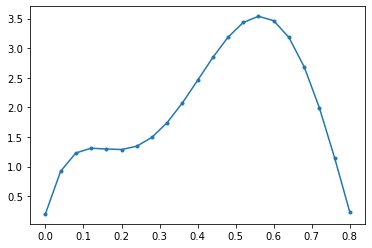

In [30]:
p = [400, -900, 675, -200, 25, 0.2]
a, b = 0, 0.8

# exact 
p1 = np.polyint(p)
Je = np.polyval(p1, b) - np.polyval(p1, a)

# numerical
n = 21
h = (b-a)/(n-1)
x = np.linspace(a, b, n)
y = np.polyval(p, x)
plt.plot(x, y, '.-')
J = trapz(y, h)
print(Je, J)

### Example 19.2

In [31]:
p = [400, -900, 675, -200, 25, 0.2]

a, b = 0, 0.8
# exact 
p1 = np.polyint(p)
Je = np.polyval(p1, b) - np.polyval(p1, a)
print(Je)

J = 1
h = b - a
for k in range(1, 8):
    Jold = J
    n = 2**k
    h = h/2
    x = np.linspace(a, b, n+1)
    y = np.polyval(p, x)
    J = trapz(y, h)
    JJ = J + (J-Jold)/3
    print("{:5d}{:5d}{:15.5e}{:15.5e}".format(k, n, (J-Jold)/3, J - Je))    

1.6405333333333332
    1    2    2.29333e-02   -5.71733e-01
    2    4    1.38667e-01   -1.55733e-01
    3    8    3.86667e-02   -3.97333e-02
    4   16    9.91667e-03   -9.98333e-03
    5   32    2.49479e-03   -2.49896e-03
    6   64    6.24674e-04   -6.24935e-04
    7  128    1.56230e-04   -1.56246e-04


### Blasius equation
In physics and fluid mechanics, a Blasius boundary layer (named after Paul Richard Heinrich Blasius) describes the steady two-dimensional laminar boundary layer that forms on a semi-infinite plate which is held parallel to a constant unidirectional flow.

$$ f''' + \frac{1}{2} f f'' = 0 $$

$$ f = f' = 0 \quad  \mbox{at} \quad x = 0 $$
$$ f' \rightarrow 1 \quad \mbox{as} \quad x \rightarrow \infty $$

Let $p = df/dx$, and $q = dp/dx = d^2f/dx^2$ then the given equation becomes 

$$\frac{dq}{dx} = -q \frac{f}{2} $$ 

변수 분리 후 적분

$$\ln q = \int_0^x -\frac{f}{2} dx + C_1$$
$$q = \frac{dp}{dx} = C \exp \left( \int_0^x - \frac{f}{2} dx \right ) $$
$$p = C\int_0^x \exp \left( \int_0^x - \frac{f}{2} dx \right ) dx$$

$$\frac{1}{C} = \int_0^\infty \exp \left( \int_0^x - \frac{f}{2} dx \right ) dx $$




0.3322861467689045 12


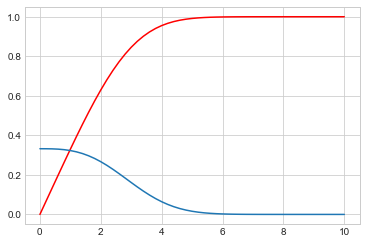

In [26]:
n = 51
x = np.linspace(0, 10, n)
h = 10/(n-1)
p = x / 10
for k in range(50):
    pold = p.copy()
    f = cumtrapz(p, h)
    q = np.exp(cumtrapz(-f/2, h))
    p = cumtrapz(q, h)
    C = 1/p[-1]
    p = C*p
    q = C*q
    if np.linalg.norm(p - pold) < 1e-6: 
        break
plt.plot(x, p,'r', x, q)
print(C, k)

In [17]:
def simps(f, h):
    
    def _sim13(f, h):
        """ n = len(f) must be odd """
        f0, f1 = f[::2], f[1::2]
        return np.sum(h/3*(f0[:-1] + 4*f1 + f0[1:]))
    
    n = len(f)
    if n % 2 == 1:
        return _sim13(f, h)
    else:
        s = _sim13(f[:n-3], h)
        f0, f1, f2, f3 = f[-4:]
        return s + 3*h*(f0 + 3*f1 + 3*f2 + f3)/8


def cumsimps(f, h):
    
    def _cum13(f, h):
        """ n = len(f) must be odd """
        f0, f1, f2 = f[0:-1:2], f[1::2], f[2::2]
        s1 = h*(5*f0 + 8*f1 - f2)/12
        s2 = h*(-f0 + 8*f1 + 5*f2)/12
        return np.cumsum(np.r_[0, np.c_[s1, s2].ravel()])
    
    n = len(f)
    s = np.zeros(n)
    if n % 2 == 1:
        return _cum13(f, h)
    else:
        s[:n-3] = _cum13(f[:n-3], h)
        f0, f1, f2, f3 = f[-4:]
        s1 = h*(9*f0 + 19*f1 - 5*f2 + f3)/24
        s2 = h*(-f0 + 13*f1 + 13*f2 - f3)/24
        s3 = h*(f0 - 5*f1 + 19*f2 + 9*f3)/24
        s[-3:] = s[-4] + np.cumsum([s1, s2, s3])
        return s

### error function
$$ \rm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-\xi^2} d\xi $$

    1    2    1.50000e+00   -1.97858e-01   -1.31920e-02
    2    4    7.50000e-01   -8.30977e-03    1.26366e-02
    3    8    3.75000e-01   -1.95183e-06    5.53855e-04
    4   16    1.87500e-01   -1.57436e-07    1.19626e-07
    5   32    9.37500e-02   -1.05206e-08    9.79438e-09
    6   64    4.68750e-02   -6.68591e-10    6.56803e-10


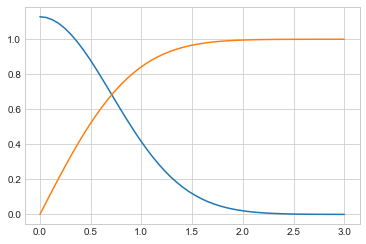

In [27]:
from scipy.special import erf

def fun(x): 
    return 2/np.sqrt(np.pi)*np.exp(-x**2)

a, b = 0, 3
x = np.linspace(a, b)
plt.plot(x, fun(x), x, erf(x))

J = 1.0
for k in range(1, 7):
    n = 2**k
    Jold = J
    x = np.linspace(a, b, n+1)    
    h = (b-a)/n
    J = simps(fun(x), h)
    print("{:5d}{:5d}{:15.5e}{:15.5e}{:15.5e}"
      .format(k, n, h, J - erf(b), (J - Jold)/15))

### 다중적분 (Multiple Integral)
$$ \int_{x_1}^{x_2} \int_{y_1}^{y_2} f(x,y) dy dx  $$

In [28]:
def trapz2(fun, x1, x2, y1, y2, nx=11, ny=11):
    x, y = np.linspace(x1,x2,nx), np.linspace(y1,y2,ny)    
    hx, hy = (x2-x1)/(nx-1), (y2-y1)/(ny-1)
    wx = np.r_[1, (nx-2)*[2], 1]
    wy = np.r_[1, (ny-2)*[2], 1]
    w = wx*wy[:,np.newaxis]
    f = fun(x, y[:,np.newaxis])    
    return np.sum(f*w)*(hx/2*hy/2)

def simps2(fun, x1, x2, y1, y2, nx=11, ny=11):
    x, y = np.linspace(x1, x2, nx), np.linspace(y1, y2, ny)
    hx, hy = (x2-x1)/(nx-1), (y2-y1)/(ny-1)
    wx = np.r_[1, (nx-3)//2*[4,2], 4, 1]
    wy = np.r_[1, (ny-3)//2*[4,2], 4, 1]
    w = wx*wy[:,np.newaxis]
    f = fun(x, y[:,np.newaxis])
    return np.sum(f*w)*(hx/3*hy/3)

In [29]:
def fun(x, y):
    return 2*x*y + 2*x - x**2 - 2*y**2 + 72
x1,x2 = 0, 8
y1,y2 = 0, 6
J1 = trapz2(fun, x1,x2, y1,y2, nx=51, ny=51)
J2 = simps2(fun, x1,x2, y1,y2)
print(J1, J2)

2815.5647999999997 2816.0


## Line integral

$$ \mathbf{r}(t) = x(t) \hat{i} + y(t) \hat{j} + z(t) \hat{k} $$ 

$$ \int_C \mathbf{F}(\mathbf{r}) \cdot d \mathbf{r} = \int_C \mathbf{F}(\mathbf{r}(t)) \cdot \frac{d \mathbf{r}}{dt} dt$$

In [30]:
from scipy.integrate import trapz

def line_integral(F_fun, r_fun, t):    
    r = r_fun(t)
    F = F_fun(r)
    dr = np.gradient(r, t, axis=1)
    f = np.diag(F.T @ dr)
    return trapz(f, t)

In [31]:
# kreysig p. 466, example 1
def F_fun(r):
    x, y = r
    return np.array([-y, -x*y])
def r_fun(t): return np.array([np.cos(t), np.sin(t)])

t = np.linspace(0, np.pi/2, 101)
sol = line_integral(F_fun, r_fun, t)    
print(sol)

0.45206680129466137


In [32]:
# kreysig p. 466, example 2
def F_fun(r):
    x, y, z = r
    return np.array([z, x, y])
def r_fun(t): return np.array([np.cos(t), np.sin(t), 3*t])

t = np.linspace(0, 2*np.pi)
sol = line_integral(F_fun, r_fun, t)    
print(sol)

21.982546382809154


In [33]:
# kreysig p. 467, example 3
def F_fun(r):
    x, y, z = r
    return np.array([5*z, x*y, x**2*z])
def r1_fun(t): return np.array([t,t,t])
def r2_fun(t): return np.array([t,t,t**2])

t = np.linspace(0, 1)
sol1 = line_integral(F_fun, r1_fun, t)    
sol2 = line_integral(F_fun, r2_fun, t)    
print(sol1, sol2)

3.083506872136609 2.33388862859273


## Double Integrals

kreysig p. 478

$$ \iint_R f(x, y) \, dx \, dy = \int_a^b \int_{g(x)}^{h(x)} f(x, y) \, dy \, dx $$

### Application of Double Integral

Area of a region $R$ in the $xy$-plane 
$$A = \iint_R dxdy$$

Volume beneath the surface $z = f(x,y) (>0)$ and above a region $R$ in the $xy$-plane 
$$V = \iint_R f(x,y) dxdy$$

Let $f(x,y)$ be the density of a distribution of mass in the $xy$-plane. Then the total mass $M$ in $R$ is 
$$M = \iint_R f(x,y) dxdy$$

The center of gravity of the mass in $R$ has the coordinates $\bar{x}$, $\bar{y}$
$$\bar{x} = \frac{1}{M} \iint_R x f(x,y) dx dy, \quad  \bar{y} = \frac{1}{M} \iint_R y f(x,y) dx dy$$

Moments of inertia $I_{xx}$, $I_{yy}$ 
$$ I_{xx} = \iint_R y^2 f(x,y) dx dy, \quad  I_{yy} = \iint_R x^2 f(x,y) dx dy$$

Polar moment of inertia
$$ I_0 = I_{xx} + I_{yy} = \iint_R (x^2 + y^2) f(x,y) dxdy$$

In [34]:
from scipy.integrate import dblquad
# kreysig, p. 481, example 1 
a, b = 0, 1
gfun = lambda x: 0
hfun = lambda x: np.sqrt(1 - x**2)
M = dblquad(lambda x, y: 1, a, b, gfun, hfun)[0]
xbar = 1/M*dblquad(lambda x, y: x, a, b, gfun, hfun)[0]
Ix = dblquad(lambda x, y: y**2, a, b, gfun, hfun)[0]
print(M, xbar, Ix)   
print(np.pi/4, 4/(3*np.pi), np.pi/16)

0.785398163397448 0.4244131815783877 0.1963495408493579
0.7853981633974483 0.4244131815783876 0.19634954084936207


$$ \iint_R f(x,y) \, dx \, dy = \iint_{R^*} f(x(u,v), y(u,v)) \, \frac{\partial(x,y)}{\partial(u,v)} \, du \, dv $$

$$ J = \frac{\partial(x,y)}{\partial(u,v)} = 
\begin{vmatrix}
\frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} \\
\frac{\partial y}{\partial u} & \frac{\partial y}{\partial v}
\end{vmatrix}
$$


$$ \iint_R f(x,y) \, dx \, dy = \iint_{R^*} f(r \cos \theta , \, r \sin \theta ) \, r \, dr \, d \theta  $$